# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [140]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [124]:
data = pd.read_csv('./data/cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [125]:
# Data exploration of head and tail
display(data.head())
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [126]:
# How many (rows, columns) does the dataset contain?
data.shape

(5391, 6)

In [127]:
# General info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [128]:
# Are there any NaN values present?
data.isna().any() # The addition of one more .any() return a single answer, considering all the columns

Rank                     False
Release_Date             False
Movie_Title              False
USD_Production_Budget    False
USD_Worldwide_Gross      False
USD_Domestic_Gross       False
dtype: bool

In [129]:
# Are there any duplicate rows?
data.duplicated().values.any()

False

In [130]:
# What are the data types of the columns?
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [131]:
# Replace the columns' values '$' and ',' with '' via regex and convert to numeric at the same time
data["USD_Production_Budget"] = data["USD_Production_Budget"].str.replace('[$,]', '', regex=True).astype("float")
data["USD_Worldwide_Gross"] = data["USD_Worldwide_Gross"].str.replace('[$,]', '', regex=True).astype("float")
data["USD_Domestic_Gross"] = data["USD_Domestic_Gross"].str.replace('[$,]', '', regex=True).astype("float")
display(data.dtypes)
data.head()

Rank                       int64
Release_Date              object
Movie_Title               object
USD_Production_Budget    float64
USD_Worldwide_Gross      float64
USD_Domestic_Gross       float64
dtype: object

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00"
1,5140,5/9/1916,Intolerance,"385,907.00",0.00,0.00
2,5230,12/24/1916,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"100,000.00","3,000,000.00","3,000,000.00"
4,5222,1/1/1925,The Big Parade,"245,000.00","22,000,000.00","11,000,000.00"


In [132]:
# # Alternative approach to cleaning and converting data

# chars_to_remove = [',', '$']
# columns_to_clean = ["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]
# for col in columns_to_clean:
#     for char in chars_to_remove:
#         data[col] = data[col].astype(str).str.replace(char, "")
#     data[col] = pd.to_numeric(data[col])

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [133]:
# Convert the Release_Date column to a Pandas Datetime type
data["Release_Date"] = pd.to_datetime(data["Release_Date"])
data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget           float64
USD_Worldwide_Gross             float64
USD_Domestic_Gross              float64
dtype: object

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [201]:
# The function describe() answers many of these questions, but below are individual commands for each one
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


In [143]:
# Average production budget of the films in the data set
avg_prod_budget = '{:,.2f}'.format(data["USD_Production_Budget"].mean())
print(f"Average production budget of the films in the data set: $ {avg_prod_budget}")

Average production budget of the films in the data set: $ 31,113,737.58


In [144]:
# Average worldwide gross revenue of filmes
avg_world_gross_rev = '{:,.2f}'.format(data["USD_Worldwide_Gross"].mean())
print(f"Average worldwide gross revenue of the films in the data set: $ {avg_world_gross_rev}")

Average worldwide gross revenue of the films in the data set: $ 88,855,421.96


In [149]:
# Minimums for worldwide and domestic revenue
min_worldwide_rev = '{:,.2f}'.format(data["USD_Worldwide_Gross"].min())
print(f"Minimum worldwide revenue of the films in the data set: $ {min_worldwide_rev}")

min_domestic_rev = '{:,.2f}'.format(data["USD_Domestic_Gross"].min())
print(f"Minimum domestic revenue of the films in the data set: $ {min_domestic_rev}")

Minimum worldwide revenue of the films in the data set: $ 0.00
Minimum domestic revenue of the films in the data set: $ 0.00


In [220]:
# Bottom 25% of films data
# Calculate profit in additional column
data["USD_Profit"] = data["USD_Worldwide_Gross"] - data['USD_Production_Budget']
data["Movie_is_Profitable"] = data["USD_Profit"].apply(lambda x: x > 0)
wordwide_gross_25q = data['USD_Worldwide_Gross'].quantile(q=0.25)
data[data['USD_Worldwide_Gross'] <= wordwide_gross_25q]["Movie_is_Profitable"].value_counts()

# Drop the new columns
data.drop(columns=["USD_Profit", "Movie_is_Profitable"], inplace=True)

In [157]:
# Highest production budget and highest worldwide gross revenue of any film
display(data[data["USD_Production_Budget"] == data["USD_Production_Budget"].max()])
data[data["USD_Worldwide_Gross"] == data["USD_Worldwide_Gross"].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,"425,000,000.00","2,783,918,982.00","760,507,625.00"


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,"425,000,000.00","2,783,918,982.00","760,507,625.00"


In [160]:
# Revenue of lowest and highest budget films
display(data[data["USD_Production_Budget"] == data["USD_Production_Budget"].min()])
data[data["USD_Production_Budget"] == data["USD_Production_Budget"].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,"1,100.00","181,041.00","181,041.00"


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,"425,000,000.00","2,783,918,982.00","760,507,625.00"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [188]:
count_zero_domestic_gross = (data["USD_Domestic_Gross"] == 0).sum()
print(f"Number of rows where USD_Domestic_Gross is $ 0: {count_zero_domestic_gross}")

# Alternative approach - make a new DataFrame and use length
# zero_domestic = data[data["USD_Domestic_Gross"] == 0]
# print(f"Number of rows where USD_Domestic_Gross is $ 0: {len(zero_domestic)}")
# zero_domestic.sort_values("USD_Production_Budget", ascending=False)

zero_domestic_gross_films = data[data['USD_Domestic_Gross'] == 0]
zero_domestic_gross_films.sort_values(by='USD_Production_Budget', ascending=False).head()

Number of rows where USD_Domestic_Gross is $ 0: 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00
5385,366,2018-10-08,Amusement Park,"100,000,000.00",0.00,0.00
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla","80,000,000.00","4,547,660.00",0.00


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [200]:
# Number of films that grossed $0 worldwide
count_zero_worldwide_gross = (data["USD_Worldwide_Gross"] == 0).sum()
print(f"Number of rows where USD_Worldwide_Gross is $ 0: {count_zero_worldwide_gross}")

# Highest budget films that had no revenue internationally
zero_worldwide_gross_films = data[data['USD_Worldwide_Gross'] == 0]
zero_worldwide_gross_films.sort_values(by="USD_Production_Budget", ascending=False).head()

Number of rows where USD_Worldwide_Gross is $ 0: 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00
5385,366,2018-10-08,Amusement Park,"100,000,000.00",0.00,0.00
5058,880,2015-11-12,The Ridiculous 6,"60,000,000.00",0.00,0.00


### Filtering on Multiple Conditions

In [205]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [222]:
data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,"3,380,000.00","3,220.00",0.00
1579,5087,2001-02-11,Everything Put Together,"500,000.00","7,890.00",0.00
1744,3695,2001-12-31,The Hole,"7,500,000.00","10,834,406.00",0.00
2155,4236,2003-12-31,Nothing,"4,000,000.00","63,180.00",0.00
2203,2513,2004-03-31,The Touch,"20,000,000.00","5,918,742.00",0.00
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,"36,000,000.00","1,480,089.00",0.00
5348,2225,2017-05-05,Chāi dàn zhuānjiā,"23,000,000.00","58,807,172.00",0.00
5360,4832,2017-07-03,Departure,"1,100,000.00","27,561.00",0.00
5372,1856,2017-08-25,Ballerina,"30,000,000.00","48,048,527.00",0.00


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [228]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

# Films that were not released yet as of the time of data collection
future_releases = data[data["Release_Date"] > scrape_date]
future_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00
5385,366,2018-10-08,Amusement Park,"100,000,000.00",0.00,0.00
5386,2950,2018-10-08,Meg,"15,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00
5389,1119,2020-12-31,Hannibal the Conqueror,"50,000,000.00",0.00,0.00
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The","20,000,000.00",0.00,0.00


In [229]:
# Create a new DataFrame without the aforementioned films
data_clean = data.drop(future_releases.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [245]:
money_losing = data_clean.loc[data_clean["USD_Production_Budget"] > data_clean['USD_Worldwide_Gross']]
print(f"Percentage of films where the production costs exceeded the worldwide gross revenue: {'{:.2f}'.format(len(money_losing)/len(data_clean) * 100)} %")

Percentage of films where the production costs exceeded the worldwide gross revenue: 37.28 %


# Seaborn for Data Viz: Bubble Charts

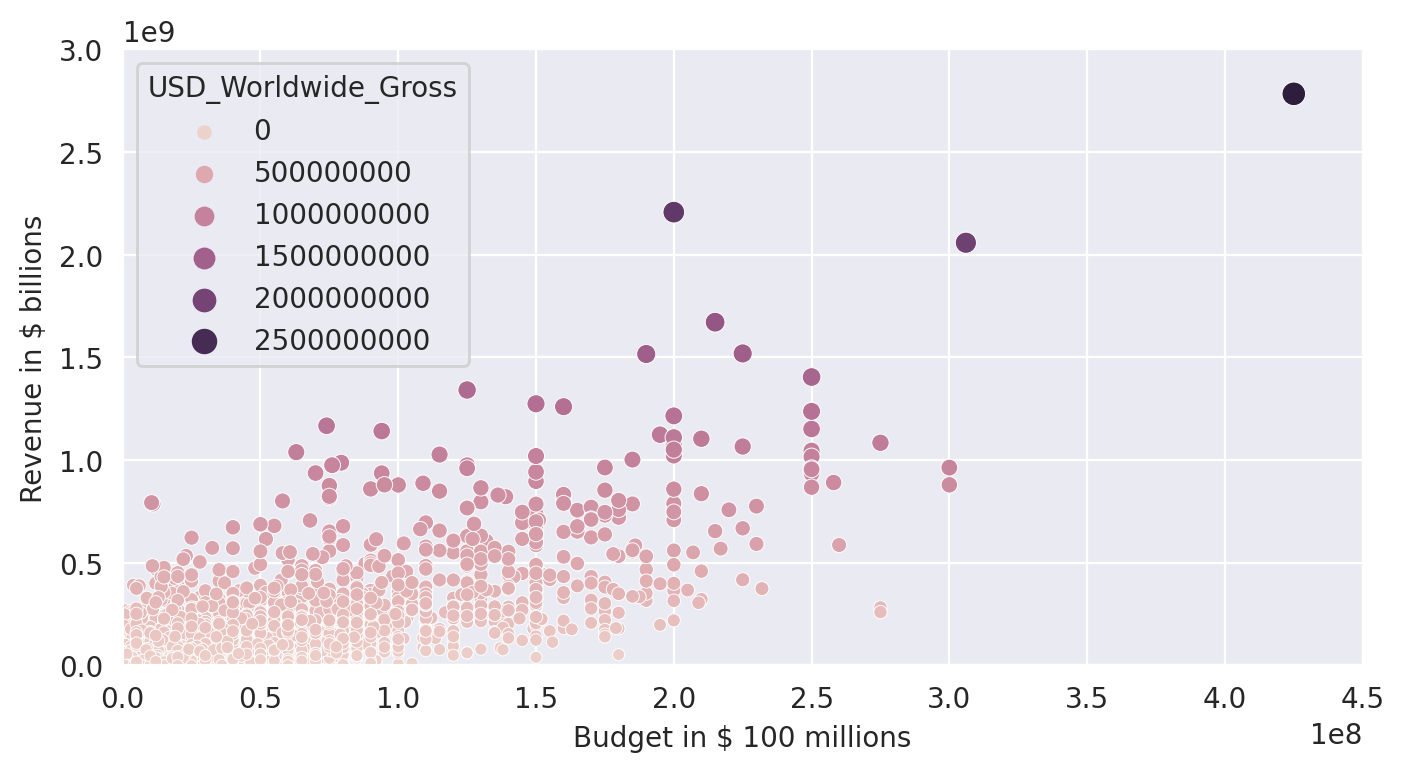

In [254]:
# Configure and plot a scatterplot
plt.figure(figsize=(8,4), dpi=200)

# The keyword 'with' allows for configuring a single chart instead of all charts in the file
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(
        data=data_clean,
        x="USD_Production_Budget",
        y="USD_Worldwide_Gross",
        hue="USD_Worldwide_Gross",
        size="USD_Worldwide_Gross"
    )

    ax.set(
        ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel="Revenue in $ billions",
        xlabel="Budget in $ 100 millions"
    )

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



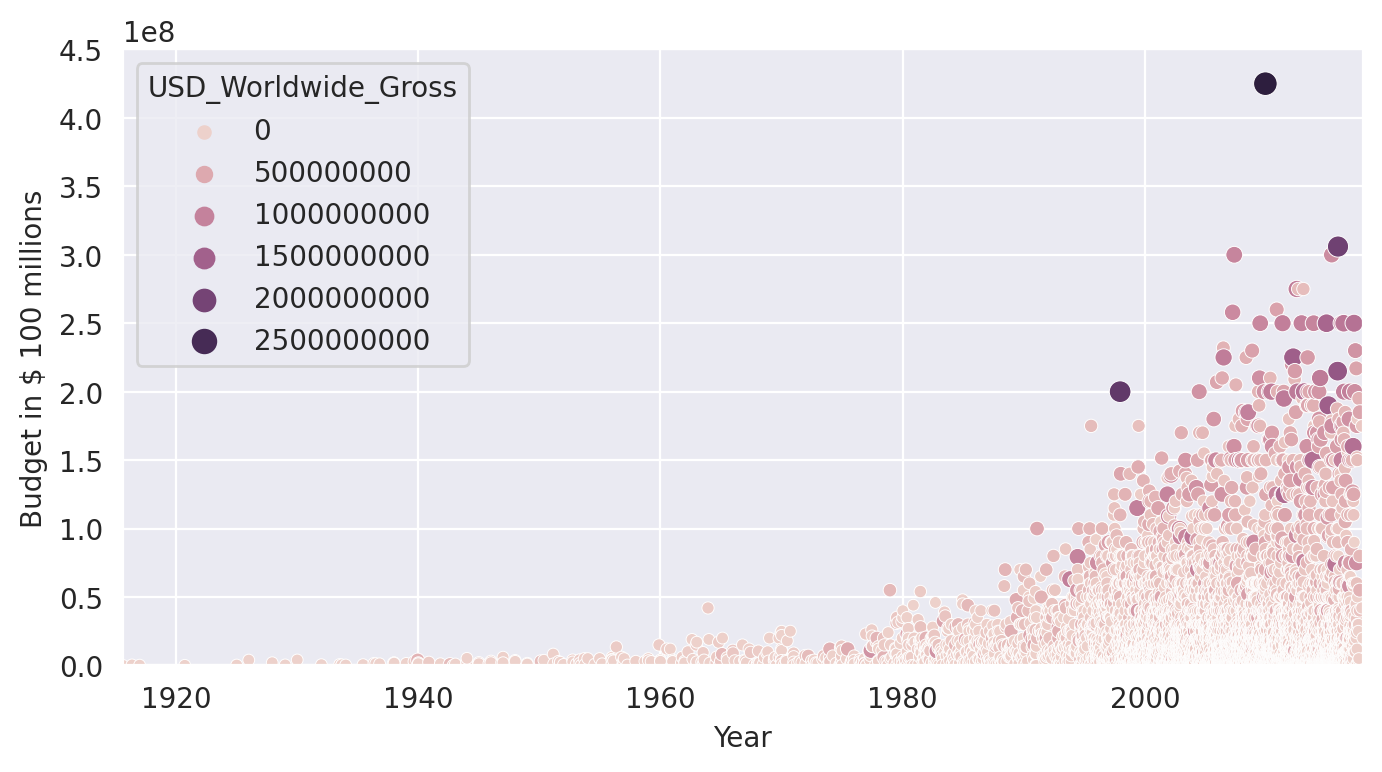

In [261]:
# Configure and plot a scatterplot
plt.figure(figsize=(8,4), dpi=200)

# The keyword 'with' allows for configuring a single chart instead of all charts in the file
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(
        data=data_clean,
        x="Release_Date",
        y="USD_Production_Budget",
        hue="USD_Worldwide_Gross",
        size="USD_Worldwide_Gross"
    )

    ax.set(
        ylim=(0, 450000000),
        xlim=(data_clean["Release_Date"].min(), data_clean["Release_Date"].max()),
        ylabel="Budget in $ 100 millions",
        xlabel="Year"
    )

plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [264]:
# Alternative one-liner approach
data_clean["Decade"] = data_clean["Release_Date"].apply(lambda x: x.year // 10 * 10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00",1910
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00",1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,"100,000.00","3,000,000.00","3,000,000.00",1920
4,5222,1925-01-01,The Big Parade,"245,000.00","22,000,000.00","11,000,000.00",1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,"40,000,000.00","166,893,990.00","92,029,184.00",2010
5380,70,2017-10-03,Kong: Skull Island,"185,000,000.00","561,137,727.00","168,052,812.00",2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,"175,000,000.00","140,012,608.00","39,175,066.00",2010
5382,1254,2017-12-05,Snatched,"42,000,000.00","57,850,343.00","45,850,343.00",2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [280]:
# Old films
old_films = data_clean[data_clean["Decade"] <= 1960]
display(old_films.describe())

# New films
new_films = data_clean[data_clean["Decade"] > 1960]
new_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153,153.00,153.00,153.00,153.00
mean,"4,274.77",1954-06-10 04:04:42.352941184,"4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
min,"1,253.00",1915-08-02 00:00:00,"100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00",1946-01-01 00:00:00,"1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00",1956-12-23 00:00:00,"2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00",1964-10-22 00:00:00,"5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00",1969-12-19 00:00:00,"42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"
std,742.14,NaN,"5,713,648.85","54,931,828.93","32,641,752.41",12.72


,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,"5,231.00",5231,"5,231.00","5,231.00","5,231.00","5,231.00"
mean,"2,652.00",2005-02-19 05:27:18.615943424,"31,811,437.73","90,683,497.56","41,841,922.35","2,000.19"
min,1.00,1970-01-01 00:00:00,"1,100.00",0.00,0.00,"1,970.00"
25%,"1,314.50",2000-07-14 00:00:00,"5,000,000.00","3,831,677.00","1,252,581.00","2,000.00"
50%,"2,629.00",2006-10-03 00:00:00,"18,000,000.00","28,544,120.00","17,510,118.00","2,000.00"
75%,"3,967.50",2012-01-06 00:00:00,"40,000,000.00","98,777,000.00","53,301,583.00","2,010.00"
max,"5,391.00",2017-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00","2,010.00"
std,"1,549.33",NaN,"40,758,580.67","170,424,978.36","66,702,734.68",9.58


In [281]:
# Most expensive film made prior to 1970
old_films[old_films["USD_Production_Budget"] == old_films['USD_Production_Budget'].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,"42,000,000.00","71,000,000.00","57,000,000.00",1960


# Seaborn Regression Plots

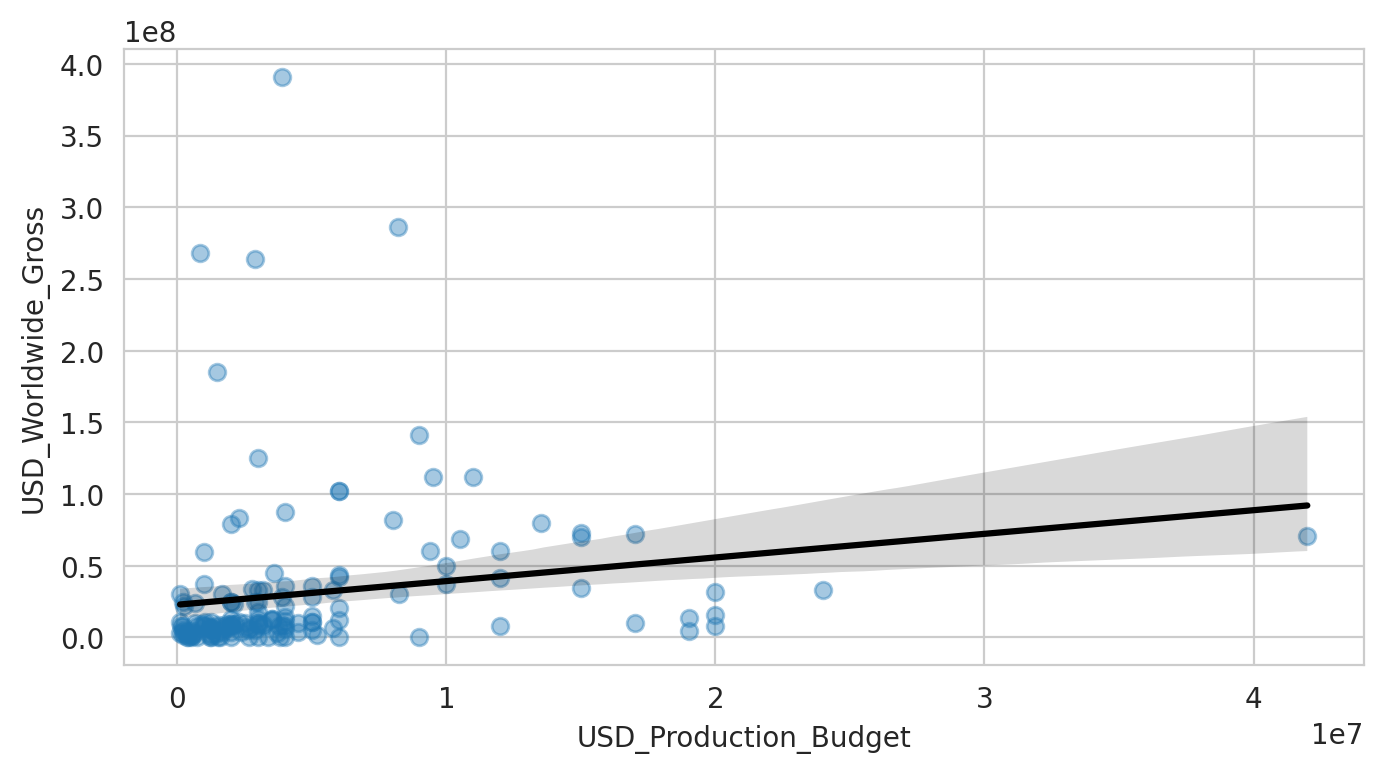

In [286]:
# Create a scatter plot and draws a linear regression line together with the confidence interval at the same time
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(
        data=old_films,
        x="USD_Production_Budget",
        y="USD_Worldwide_Gross",
        scatter_kws = {'alpha': 0.4},
        line_kws = {'color': 'black'}
    )

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

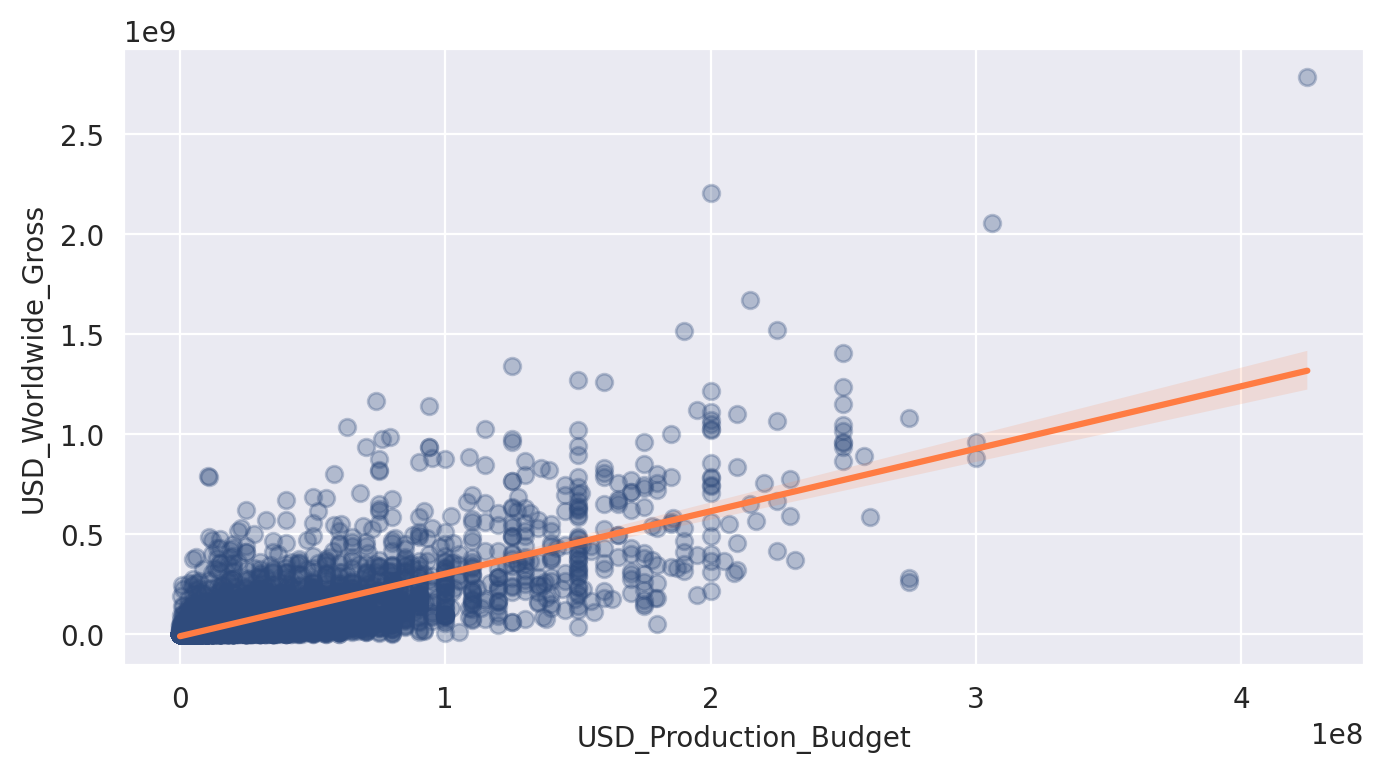

In [291]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    sns.regplot(
        data=new_films,
        x="USD_Production_Budget",
        y="USD_Worldwide_Gross",
        color='#2f4b7c',
        scatter_kws = {'alpha': 0.3},
        line_kws = {'color': '#ff7c43'})
    
    ax.set(
        ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel="Budget in millions",
        xlabel="Revenue in billions"
    )

#### - Newer movies have a much more accurate budget/gross ratio prediction
#### - The confidence interval is much narrower

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

Above is the structure of the regression line - The **theta 0** refers to the **y-axis intercept** and the **theta 1** refers to the **slope**. These explanatory variables are referred to, in machine learning terminology, to **features**.

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

### Linear Regression for New Films (extra)

In [319]:
# Create a LinearRegression object from scikit learn
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=["USD_Production_Budget"])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=["USD_Worldwide_Gross"])

In [320]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [321]:
# Look at the values of theta

# Theta zero
regression.intercept_

array([-8650768.00661033])

In [322]:
# Theta one
regression.coef_

array([[3.12259592]])

In [323]:
# Measure R-Squared
print(f"The R-Squared for the model is {'{:.2f}'.format(regression.score(X, y) * 100)} %")

The R-Squared for the model is 55.77 %


### Linear Regression for old films

In [314]:
X = pd.DataFrame(old_films, columns=["USD_Production_Budget"])
y = pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])
regression.fit(X, y)
print(f"The slope coefficient is: {regression.coef_[0]}")
print(f"The intercept is: {regression.intercept_[0]}")
print(f"The r-squared is: {'{:.2f}'.format(regression.score(X, y) * 100)} %") # Very small. The model cannot predict accurately

The slope coefficient is: [1.64771314]
The intercept is: 22821538.635080382
The r-squared is: 2.94 %


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [318]:
# A crude approach would be to use the intercept and the slope of the new_films model:
-8650768 + 3.12259592 * 350000000

1084257804.0

In [326]:
# Regression object approach
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0] * budget
revenue_estimate = round(revenue_estimate[0], -6)
print(f'The estimated revenue for a $350 film is around ${'revenue_estimate}.')

The estimated revenue for a $350 film is around $1084000000.0.
